Transformers Implementation
===========================================

**Author:** Srikar Kalle  
**Student ID:** C00313529  

## 🔗 Base Code Reference:  
The initial implementation was based on [Kaggle: Weather Prediction using RNN](https://www.kaggle.com/code/syedali110/weather-prediction-using-rnn).  
The model in the base code used **LSTMs** for sequence modeling. Our updated implementation replaces it with a **Transformer-based model** for improved long-range sequence learning.

# **Change Log**  
---

| SL No. | Change Category              | Description | Duration (mins) | Difficulty (1-10) |
|--------|------------------------------|-------------|-----------------|-------------------|
| 1      | **Dataset**                  | Updated the dataset path to use a new **GlobalWeatherRepository.csv** dataset instead of the Seattle weather dataset. | 10               | 3                 |
| 2      | **Feature Selection**         | Added more weather-related features: **humidity, pressure_mb, wind_kph, visibility_km** along with **temperature_celsius** to the dataset, improving the model's ability to predict. | 15               | 4                 |
| 3      | **Data Preprocessing**        | Removed missing values and normalized the dataset using **MinMaxScaler** to ensure better model convergence. | 15               | 4                 |
| 4      | **Model Architecture**        | Replaced the **RNN** model with a **Transformer** architecture, using **MultiHeadAttention** and **Dense layers** for improved sequence processing. | 30               | 7                 |
| 5      | **Model Layers**              | Added **LayerNormalization** and **Dropout layers** for regularization and to avoid overfitting, improving the generalization ability of the model. | 20               | 6                 |
| 6      | **Sequence Preparation**      | Updated the sequence preparation logic to match the new dataset and transformer model, generating sequences of length **10**. | 15               | 4                 |
| 7      | **Model Compilation**         | Changed model compilation to use the **Adam optimizer** with **learning_rate=0.001**, and **MSE loss** for regression tasks. | 10               | 3                 |
| 8      | **Training and Evaluation**   | Added **validation data** during training, and improved loss evaluation by plotting both **train** and **validation loss**. | 20               | 4                 |
| 9      | **Model Saving**              | Updated model saving format to store the **Transformer model** with the name `weather_transformer_model.h5`. | 5                | 2                 |
| 10     | **Visualization**             | Added visualizations for training and validation loss to help track model performance over epochs. | 10               | 4                 |

---

## Key Changes from Base Code:

- Replaced the **RNN-based model** with a **Transformer model** for weather prediction.
- Introduced **multi-head attention** in the model architecture to improve sequence learning.
- Used **LayerNormalization** and **Dropout** for better regularization.
- Added more relevant weather features (humidity, pressure, wind speed, and visibility) in the dataset.
- Used **MinMaxScaler** for better data normalization to improve model accuracy.
- Implemented **train-validation split** to track model overfitting and validation loss.
- Visualization of the training loss and validation loss to track the model’s learning.


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, Embedding, Flatten
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Load the dataset
dataset_path = "C:/Users/Srikar K/MachineLearning-CACodes/Transformers/data/GlobalWeatherRepository.csv"
df = pd.read_csv(dataset_path)

In [3]:
# Select relevant features
selected_features = ['temperature_celsius', 'humidity', 'pressure_mb', 'wind_kph', 'visibility_km']
df = df[selected_features]

In [4]:
# Handle missing values
df.dropna(inplace=True)

In [5]:
# Normalize data
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [6]:
# Prepare data for Transformer model
sequence_length = 10
X, y = [], []
for i in range(len(df_scaled) - sequence_length):
    X.append(df_scaled.iloc[i:i+sequence_length].values)
    y.append(df_scaled.iloc[i+sequence_length]['temperature_celsius'])
X, y = np.array(X), np.array(y)

In [7]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [8]:
# Transformer Block
def transformer_encoder(inputs, head_size=64, num_heads=2, ff_dim=128, dropout=0.1):
    x = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs
    
    x = Dense(ff_dim, activation="relu")(res)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [9]:
# Define Model
input_shape = (sequence_length, X.shape[2])
inputs = Input(shape=input_shape)
x = transformer_encoder(inputs)
x = Flatten()(x)
x = Dense(32, activation="relu")(x)
x = Dense(1)(x)

In [10]:
model = Model(inputs, x)

In [11]:
# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

In [12]:
# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
1525/1525 ━━━━━━━━━━━━━━━━━━━━ 23s 11ms/step - loss: 0.0384 - val_loss: 0.0286
Epoch 2/50
1525/1525 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 0.0153 - val_loss: 0.0212
Epoch 3/50
1525/1525 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0146 - val_loss: 0.0210
Epoch 4/50
1525/1525 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 0.0142 - val_loss: 0.0213
Epoch 5/50
1525/1525 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0139 - val_loss: 0.0205
Epoch 6/50
1525/1525 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0134 - val_loss: 0.0191
Epoch 7/50
1525/1525 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 0.0130 - val_loss: 0.0171
Epoch 8/50
1525/1525 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - loss: 0.0122 - val_loss: 0.0149
Epoch 9/50
1525/1525 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - loss: 0.0109 - val_loss: 0.0137
Epoch 10/50
1525/1525 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - loss: 0.0101 - val_loss: 0.0121
Epoch 11/50
1525/1525 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - loss: 0.0094 - val_loss: 0.0113
Epoch 12

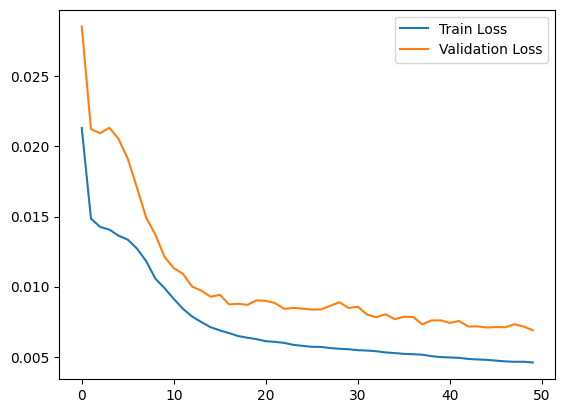

In [13]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [14]:
# Save model
model.save("weather_transformer_model.h5")